<a href="https://colab.research.google.com/github/WanjikuGithu/Hypothyroid_dataset_analysis/blob/main/Week8_IP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Classification Exercise on Hypothyroidism dataset**

**1. Defining the question**

**a. Specifying the question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The task is to use the healthcare dataset provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**b. Defining the metrics for success**

The different models will be evaluated using the accuracy scores and F1 scores

**c. Recording the Experimental Design**

The following are the steps taken in analysing and modelling the data:


*   Reading and Exploring the dataset
*   Checking for outliers and Missing data
*   EDA
*   Implementing Decision Trees Models
*   Implementing Support Vector Machines Models
*   Comparison of the different models created





**2. Reading the data**

In [59]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [60]:
# Loading the data
df = pd.read_csv('hypothyroid.csv')

**3. Checking the data**

In [61]:
# Determining the number of records
df.shape

(3163, 26)

In [62]:
# Viewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [63]:
# Viewing the bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [64]:
# Viewing the datatypes
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [65]:
# Checking for missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [66]:
# Statistical summary of the data
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [67]:
# There's a alot of ? in the dataset
# Converting these question marks to Nan values
df.replace('?', np.nan, inplace=True)

In [68]:
# Using a dictionary to convert specific columns to numerical ones
convert_dict = {'age': float, 
                'TSH': float,
                'T3' : float,
                'TT4' : float,
                'T4U' : float,
                'FTI' : float
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object


In [69]:
# Now checking for missing values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [70]:
# Dealing with the missing values
# Dropping TBG and TBG_measured columns
#
df = df.drop(['TBG', 'TBG_measured'], axis = 1)

# Filling NAs in the numerical columns with the mean
column_names = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for column in column_names:
  df[column].fillna(df[column].mean(), inplace = True)

# Filling NAs in the sex column with mode
df.sex.fillna(df.sex.mode()[0], inplace = True)

In [71]:
# Checking for the missing values again
df.isnull().sum().any()

False

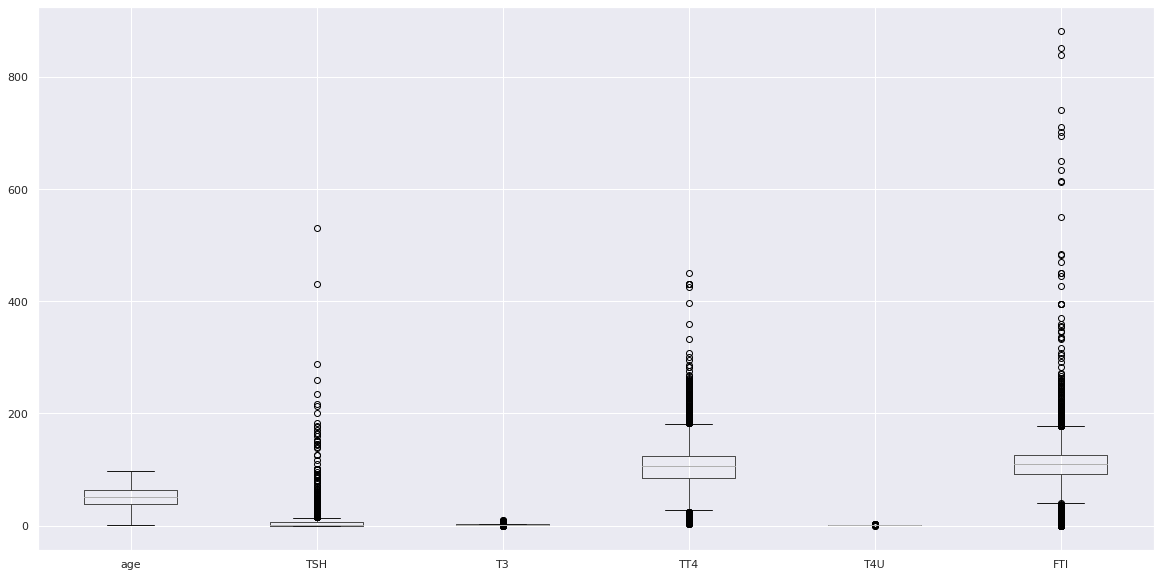

In [72]:
# Checking for outliers
df.boxplot(figsize=(20,10))
plt.show()


**4. Exploratory Data Analysis**

In [73]:
# Frequency count of the status column
df.status.value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [74]:
# Dispalying the statistical summary  of the numerical variables
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,17.881969,22.060029,0.880441,43.657766,0.217513,57.838927
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


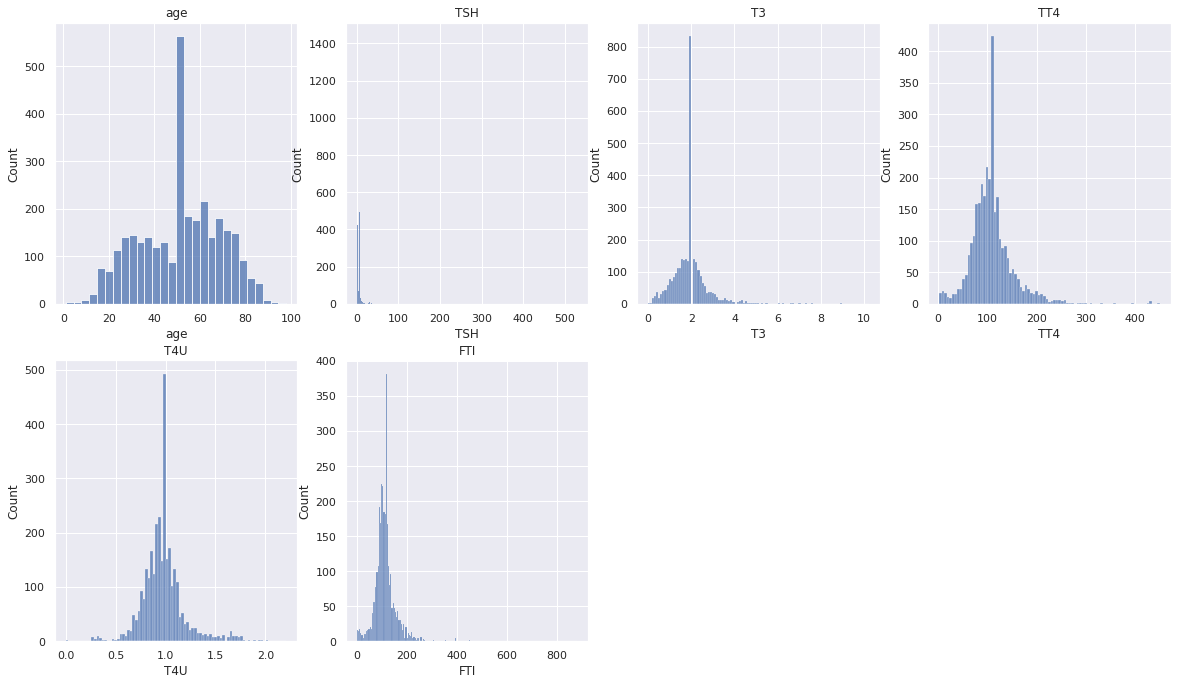

In [75]:
# Histograms of the numerical columns to see their distributions
columns_dict={'age': 1, 'TSH': 2, 'T3': 3, 'TT4': 4, 
                   'T4U': 5, 'FTI': 6}
plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  sns.histplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

In [76]:
# Looking at the correlation matrix of the variables
df.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007429,-0.268648,-0.091175,-0.194656,0.015460
TSH,-0.007429,1.000000,-0.171647,-0.309565,0.068993,-0.244146
T3,-0.268648,-0.171647,1.000000,0.545331,0.388043,0.293912
TT4,-0.091175,-0.309565,0.545331,1.000000,0.322826,0.684872
T4U,-0.194656,0.068993,0.388043,0.322826,1.000000,-0.283253
FTI,0.015460,-0.244146,0.293912,0.684872,-0.283253,1.000000


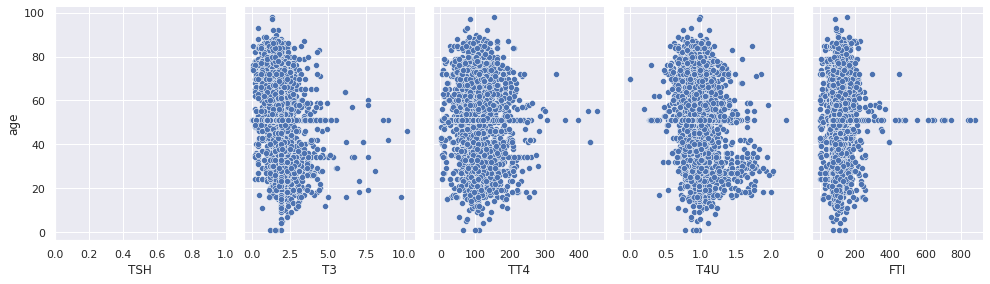

In [77]:
# Viewing a scatterplot of the other variables with age
sns.pairplot(df, x_vars=['TSH', 'T3','TT4', 'T4U', 'FTI'], y_vars='age', height=4, aspect=0.7)
plt.show()

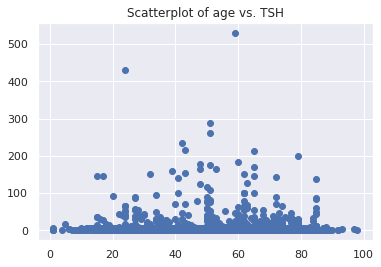

In [78]:
plt.scatter(df['age'], df['TSH'])
plt.title('Scatterplot of age vs. TSH')
plt.show()

**5. Implementing the solution**

**Random Forest Classifier**

In [79]:
# Random Forests
# Defining the independent and dependent variables
X = df.drop(['status'], axis=1)
y = np.where(df['status'] == 'hypothyroid', 1, 0)


In [80]:
# Converting the non numerical columns using dummies
X = pd.get_dummies(X)

In [81]:
X.head()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1
4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1


In [82]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialising the random forest classifier
classifier = RandomForestClassifier()

# Fitting the model on the training set
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
# Running the prediction
y_pred = classifier.predict(X_test)

# Comparing the true and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
944,0,0
945,0,0
946,0,0
947,0,0


In [84]:
# Checking the accuracy
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix", metrics.confusion_matrix(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy score: 0.9884088514225501
Confusion matrix [[906   4]
 [  7  32]]
F1 Score: 0.8533333333333333


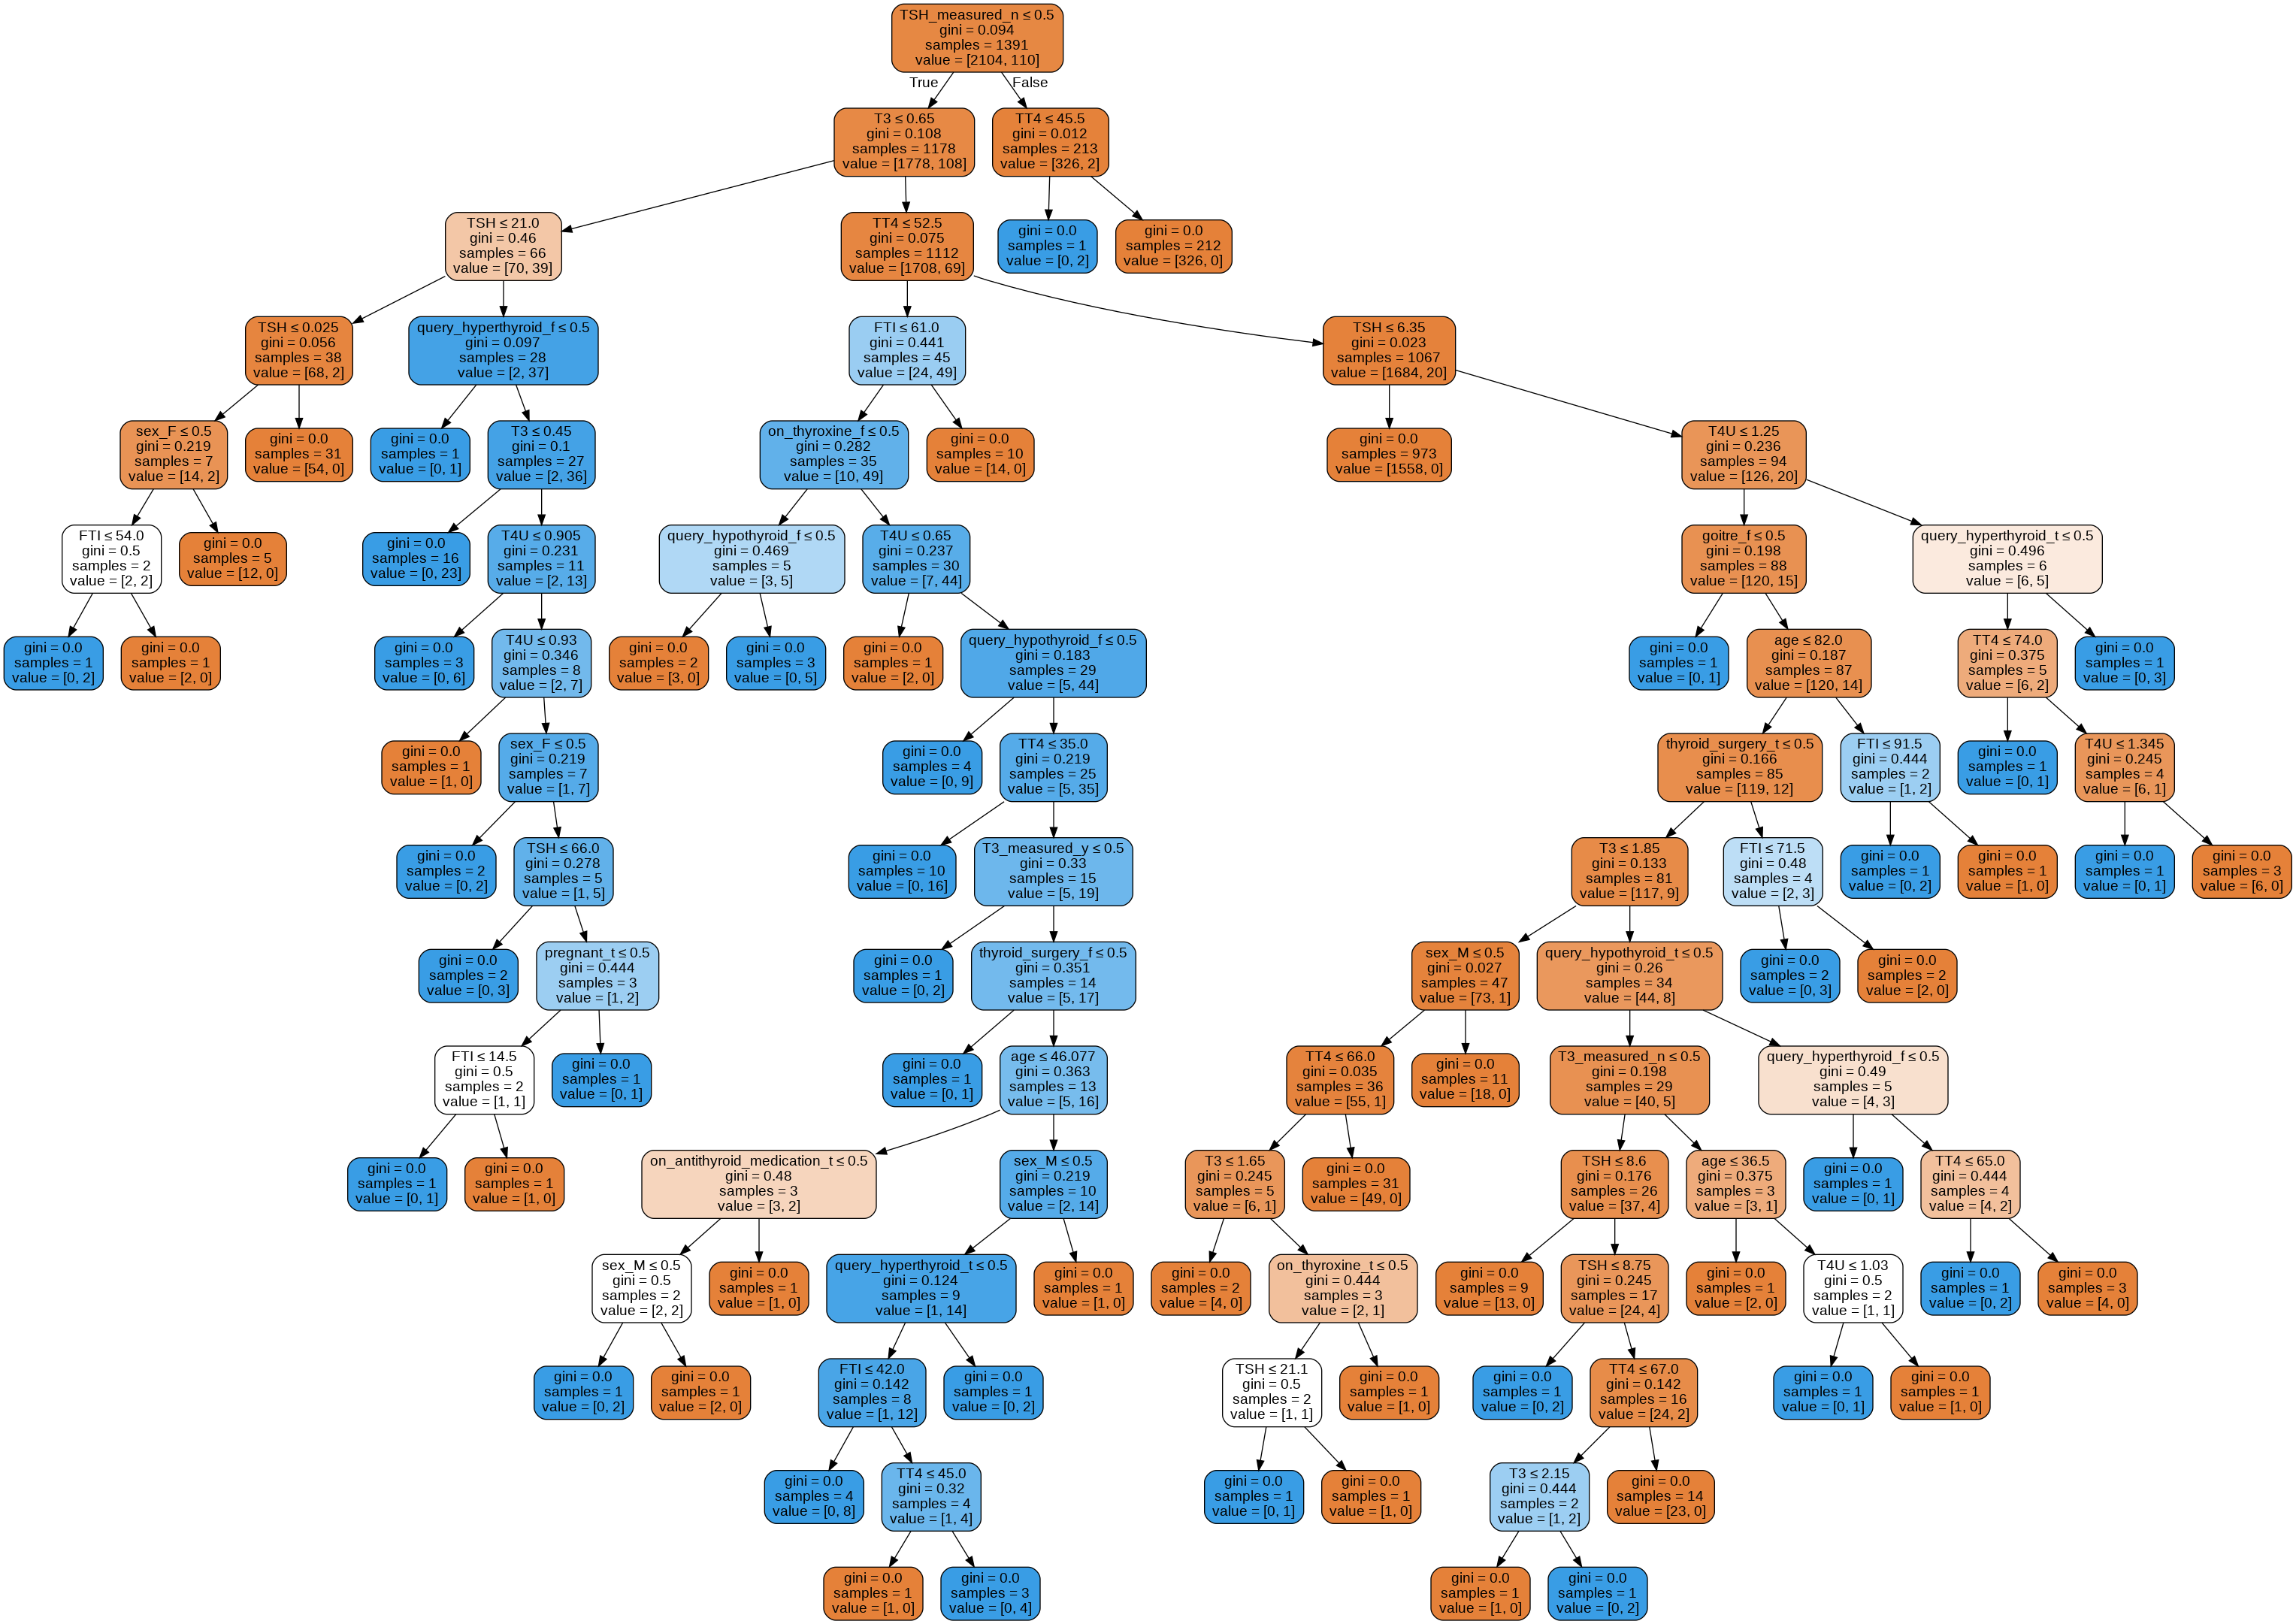

In [85]:
# Visualising the 50th tree
dot_data = StringIO()
tree = classifier.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [86]:
# Determining the most important features
rank_df = pd.DataFrame({'features': X.columns, 'importance_value': np.round(classifier.feature_importances_, 5)}).set_index('features').sort_values(by = 'importance_value', ascending = False)
rank_df

,importance_value
features,
FTI,0.34100
TT4,0.23385
TSH,0.22922
T3,0.05926
T4U,0.04126
age,0.03124
on_antithyroid_medication_t,0.00675
on_antithyroid_medication_f,0.00610
TSH_measured_n,0.00428


In [87]:
# Hyperparameter tuning to find the best hyperparameters
classifier = RandomForestClassifier()
n_estimators = [50, 100, 150,200]
max_depth = [1,2,3,4,5]
min_samples_split = [1,2,3,4,5]

hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
hyperparameters

{'max_depth': [1, 2, 3, 4, 5],
 'min_samples_split': [1, 2, 3, 4, 5],
 'n_estimators': [50, 100, 150, 200]}

In [88]:
# Creating grid search using 10-fold cross validation
grid = GridSearchCV(classifier, hyperparameters, cv=10, verbose=0)

In [ ]:
# Fitting grid search
best_model = grid.fit(X, y)
# best_model

In [90]:
# Viewing our cv results in a dataframe
grid.cv_results_
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041377,0.019950,0.000000,0.000000,1,1,50,"{'max_depth': 1, 'min_samples_split': 1, 'n_es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,0.041727,0.003341,0.000000,0.000000,1,1,100,"{'max_depth': 1, 'min_samples_split': 1, 'n_es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
2,0.061168,0.005225,0.000000,0.000000,1,1,150,"{'max_depth': 1, 'min_samples_split': 1, 'n_es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
3,0.082033,0.013742,0.000000,0.000000,1,1,200,"{'max_depth': 1, 'min_samples_split': 1, 'n_es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
4,0.081057,0.002261,0.005545,0.000135,1,2,50,"{'max_depth': 1, 'min_samples_split': 2, 'n_es...",0.949527,0.952681,0.952681,0.952532,0.952532,0.952532,0.952532,0.952532,0.952532,0.952532,0.952261,0.000913,65


In [91]:
# Viewing best parameters
print('Best Parameters:', best_model.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [92]:
# Remodelling with the 10 most important features and the best hyperparameters
X = df[['FTI', 'TSH', 'TT4', 'T3',	'age', 'T4U',	'on_antithyroid_medication',	'TSH_measured', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]
y = np.where(df['status']=='hypothyroid',1,0)
X = pd.get_dummies(X)

In [93]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialising the random forest classifier
classifier = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=2)

# Fitting the model on the training set
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
# Running the prediction
y_pred = classifier.predict(X_test)

# Comparing the true and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [95]:
# Checking the accuracy
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix", metrics.confusion_matrix(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy score: 0.9873551106427819
Confusion matrix [[904   6]
 [  6  33]]
F1 Score: 0.8461538461538461


**Ada Boosted Classifier**

In [96]:
# Initialising the Ada Boost model 
ada_classifier = AdaBoostClassifier()

# Fitting the model
ada_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = ada_classifier.predict(X_test)

# Comparison with the actual values
comparison_df_ada = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
comparison_df_ada.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [97]:
# Viewing the accuracy of the ada boosted model
print("Confusion matrix:", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Confusion matrix: [[901   9]
 [  4  35]]
Accuracy score: 0.9863013698630136
F1 Score: 0.8433734939759037
Recall: 0.8974358974358975
Precision: 0.7954545454545454


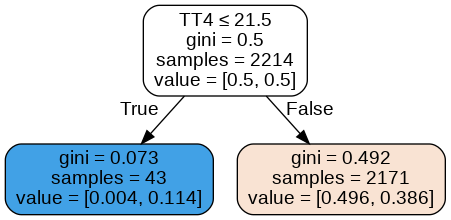

In [98]:
# Visualising the 5th stump
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada_classifier.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Gradient Boosting Classifier**

In [99]:
# Initialising the gradient boosting classifier
gradient_classifier = GradientBoostingClassifier()

# Fitting the model
gradient_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = gradient_classifier.predict(X_test)

# Comparison with the actual values
comparison_df = pd.DataFrame({"Actual":y_test.flatten(), "Predicted":y_pred.flatten()})
comparison_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [100]:
# Viewing the accuracy of the gradient boosting classifier
print("Confusion matrix:", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy_score:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Confusion matrix: [[901   9]
 [  5  34]]
Accuracy_score: 0.9852476290832455
Precision: 0.7906976744186046
F1 Score: 0.8292682926829267
Recall: 0.8717948717948718


The random forest classifier identified the most important variables as:FTI,TT4	,TSH	,T3	,T4U	and age. 
From the accuracy scores values, it is clear that most of the models are overfitting. The tuning slightly helped to reduce this. The ada boosting classifier had a slightly higher accuracy score than that of the gradient boosting classifier.

**Support Vector Machines Classifier**

In [101]:
X = df[['FTI', 'TT4']]
y = np.where(df['status']=='hypothyroid',1,0)
X = StandardScaler().fit_transform(X)



In [102]:
# Splitting the data into training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**Fitting the Linear SVC**

In [103]:
# Initialising the linear SVC
linear_svc = SVC(kernel='linear')

# Fitting the linear SVC
linear_svc.fit(X_train, y_train)

# Running the prediction
y_pred = linear_svc.predict(X_test)

# Computing the accuracies
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


Accuracy score: 0.9747235387045814
F1 Score: 0.6666666666666667


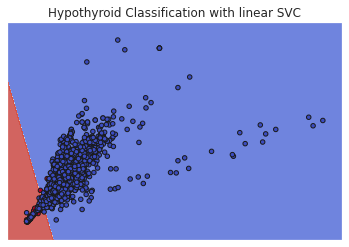

In [104]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, linear_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Fitting the Polynomial SVC**

In [105]:
# Initialising the polynomial SVC
polynomial_svc = SVC(kernel='poly')

# Fitting the polynomial SVC
polynomial_svc.fit(X_train, y_train)

# Running the prediction
y_pred = polynomial_svc.predict(X_test)

# Computing the accuracies
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


Accuracy score: 0.9715639810426541
F1 Score: 0.5909090909090908


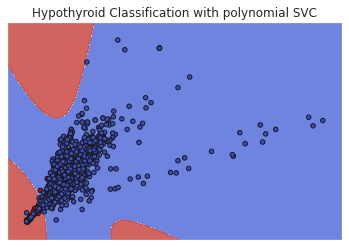

In [106]:
# Visualizing the results
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polynomial_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polynomial_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Fitting the RBF SVC**

In [107]:
# Initialising RBF svc
rbf_svc = SVC(kernel='rbf')

# Fitting the polynomial SVC
rbf_svc.fit(X_train, y_train)

# Running the prediction
y_pred = rbf_svc.predict(X_test)

# Computing the accuracies
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy score: 0.9747235387045814
F1 Score: 0.6666666666666667


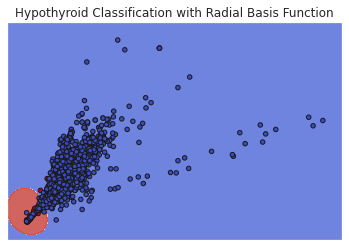

In [108]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with Radial Basis Function')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf_svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Hyperparameter Tuning**

In [112]:
classifier = SVC(kernel='rbf')
C = [0.01, 0.1, 1, 10, 100]
gamma = ['scale', 'auto', 1, 10]

hyperparameters = dict(C=C, gamma=gamma)
hyperparameters

{'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 10]}

In [113]:
# Creating grid search using 10-fold cross validation
grid = GridSearchCV(classifier, hyperparameters, cv=5, verbose=0)

In [114]:
# Fitting grid search
best_model = grid.fit(X, y)
# best_model

In [115]:
# Viewing our cv results in a dataframe
grid.cv_results_
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023996,0.004375,0.004881,0.000271,0.01,scale,"{'C': 0.01, 'gamma': 'scale'}",0.951027,0.952607,0.952607,0.952532,0.952532,0.952261,0.000618,17
1,0.021583,0.000643,0.004629,0.000109,0.01,auto,"{'C': 0.01, 'gamma': 'auto'}",0.951027,0.952607,0.952607,0.952532,0.952532,0.952261,0.000618,17
2,0.023832,0.001363,0.004973,0.000512,0.01,1,"{'C': 0.01, 'gamma': 1}",0.951027,0.952607,0.952607,0.952532,0.952532,0.952261,0.000618,17
3,0.031049,0.002212,0.007061,0.001461,0.01,10,"{'C': 0.01, 'gamma': 10}",0.951027,0.952607,0.952607,0.952532,0.952532,0.952261,0.000618,17
4,0.022516,0.003308,0.004850,0.001248,0.1,scale,"{'C': 0.1, 'gamma': 'scale'}",0.979463,0.979463,0.974724,0.976266,0.966772,0.975337,0.004661,15


In [117]:
# Viewing best parameters
print('Best Parameters:', best_model.best_params_)


Best Parameters: {'C': 10, 'gamma': 1}


In [118]:
# Remodelling with the best parameters
rbf_svc = SVC(kernel='rbf', C=10 , gamma=1)

# Fitting the polynomial SVC
rbf_svc.fit(X_train, y_train)

# Running the prediction
y_pred = rbf_svc.predict(X_test)

# Computing the accuracies
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy score: 0.9731437598736177
F1 Score: 0.6530612244897959


**Conclusion**

The linear svc and radial basis function had similar acuuracy scores and f1 scores. The polynomial had the lowest f1 scores among the different models. The best C and gamma parameters, after being remodelled slightly helped reduced overfitting. The models could be further tested on more hypothyroid records to see how well they would perform in the prediction of hypothyroidism.